In [86]:
#%% file import pre procesing
import pandas as pd
import numpy as np



#plots
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [98]:
# read in pup merged file 
le16_df = pd.read_excel('le16_p3_calls.xlsx')
le15_df = pd.read_excel('le15_p3_calls.xlsx')

pup_df = pd.concat([le16_df,le15_df])
pup_df

,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Rat
0,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,1,Usv,True,0.690815,0.044876,0.079959,0.035082,52.381162,52.081866,53.877641,1.795775,0.408459,-39.452935,1.048092,-75.596722,0.720937,52.680458,WT,581
1,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,2,Usv,True,0.917282,37.562044,37.613821,0.051776,43.119266,42.859327,43.899083,1.039755,0.333442,8.532215,1.119662,-90.032680,0.455021,43.379205,WT,581
2,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,3,Usv,True,0.534721,37.649007,37.665313,0.016306,30.375314,29.521043,32.938128,3.417085,1.330307,-168.786741,1.142231,-109.660727,0.199961,30.375314,WT,581
3,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,4,Flat,True,0.817622,41.276037,41.386155,0.110118,42.038043,41.385870,45.298913,3.913043,0.777406,-17.482311,1.621281,-81.213123,0.639960,43.342391,WT,581
4,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,5,Usv,True,0.767722,41.786509,41.791733,0.005224,41.349496,40.968330,41.349496,0.381166,0.208773,-58.376762,1.271527,-97.818981,0.379049,41.349496,WT,581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,6,Inverted_U,True,0.795375,83.304009,83.350457,0.046447,44.842094,42.739620,45.142447,2.402827,0.725677,-39.691387,1.173284,-77.436638,0.725098,45.142447,KO,568
398,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,7,Downward_Ramp,True,0.508736,105.677868,105.683162,0.005294,65.381637,63.501106,71.399336,7.898230,3.774203,767.256637,5.963294,-103.317586,0.190047,63.501106,KO,568
399,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,8,Downward_Ramp,True,0.661902,182.973703,182.992056,0.018353,61.450985,60.040197,62.861774,2.821577,1.204690,53.172662,2.522225,-103.281297,0.210152,62.509077,KO,568
400,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,9,Usv,True,0.501538,258.900187,258.936310,0.036124,55.235253,51.574204,56.031133,4.456929,1.628478,-49.805320,1.432218,-102.896638,0.176167,54.439373,KO,568


In [99]:
# if row contains iso1 set iso 1 in timepoint column'


pup_df['Timepoint'] = pup_df["File"].str.extract("(iso1|iso2)")[0] #grab isolation from filename
#pup_df['Rat'] = pup_df['File'].str.extract(r'Detections\\(.*?_)') # grab rat name in filename
#('(fxs_calls\.*?)\_')
pup_df['Timepoint'].unique()

array(['iso2', 'iso1', nan], dtype=object)

# Call Number comparison

In [100]:
# call number compared
pup_df_g = pup_df.groupby(['Rat','Genotype','Timepoint']).count() # counts number of rows(calls) per rat
pup_df_g = pup_df_g.reset_index() # adds indices back to columns for graphing


In [144]:
pup_df_rat_avg = pup_df.groupby(['Rat','Genotype','Timepoint']).mean()
pup_df_rat_avg = pup_df_rat_avg.reset_index()
pup_df_rat_avg

C:\Users\User\AppData\Local\Temp\ipykernel_8896\4212151507.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pup_df_rat_avg = pup_df.groupby(['Rat','Genotype','Timepoint']).mean()


,Rat,Genotype,Timepoint,ID,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Minute
0,563,WT,iso1,145.5,1.0,0.744864,189.135382,189.208657,0.073275,43.415429,38.664455,54.704713,16.040258,5.197575,80.397694,2.317582,-85.216960,0.472300,44.244094,3.317241
1,563,WT,iso2,11.0,1.0,0.733865,59.521085,59.565005,0.043920,46.317804,44.216565,48.389634,4.173070,1.321878,-92.772817,1.202214,-87.626276,0.505022,45.988791,3.285714
2,564,KO,iso1,2.5,1.0,0.706671,107.698980,107.722208,0.023228,47.628293,45.261550,49.076146,3.814596,1.413556,-66.995628,1.417402,-96.030109,0.374767,47.514986,2.250000
3,564,KO,iso2,1.5,1.0,0.520460,170.683522,170.711669,0.028147,45.738708,44.605397,47.199643,2.594246,0.964615,-39.821491,1.378453,-105.031219,0.228283,46.141552,3.000000
4,565,KO,iso1,3.5,1.0,0.567584,111.111102,111.132806,0.021704,54.470336,51.868035,56.570081,4.702046,1.703755,1.463077,2.192984,-103.756785,0.207474,54.595171,2.833333
5,566,KO,iso1,29.0,1.0,0.752343,67.249901,67.352317,0.102416,41.851485,40.553239,43.571630,3.018391,0.678173,0.478634,1.396861,-82.822546,0.606059,41.713220,2.824561
6,566,KO,iso2,6.5,1.0,0.732582,73.020563,73.087297,0.066734,45.380987,43.793018,48.517095,4.724077,1.053254,8.524934,1.417670,-89.397006,0.463918,45.406070,3.166667
7,568,KO,iso2,5.5,1.0,0.710005,109.108754,109.160720,0.051966,47.059791,45.176238,48.388331,3.212093,1.118907,48.550003,1.936102,-90.332834,0.462234,46.975930,2.100000
8,580,WT,iso2,4.0,1.0,0.773755,99.075485,99.150433,0.074948,46.722741,44.697402,47.950610,3.253208,1.049024,-41.652980,1.179274,-83.289722,0.586543,46.068550,2.857143
9,581,WT,iso1,121.5,1.0,0.765175,134.280551,134.429373,0.148822,42.825081,41.168541,44.107050,2.938510,0.627264,-1.915897,1.468775,-76.876831,0.700551,42.876859,3.425620


### Call number graphs

Text(0.5, 1.0, 'Average Call Number p3')

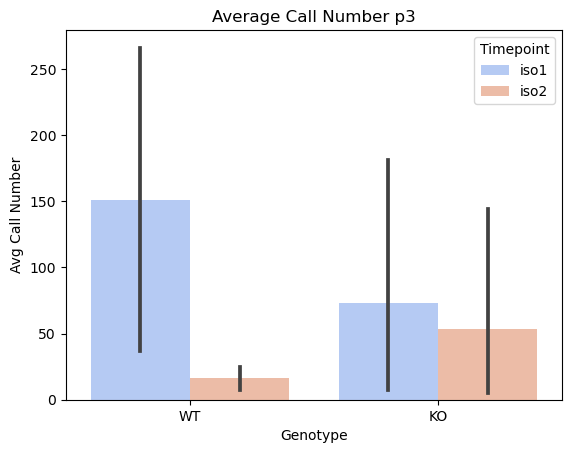

In [101]:
# graph male genotype differences in average call number

sns.barplot(data = pup_df_g,x = 'Genotype',y='File',hue='Timepoint', hue_order = ['iso1', 'iso2'],order = ['WT','KO'],palette='coolwarm')
plt.ylabel('Avg Call Number')
plt.xlabel('Genotype')
plt.title('Average Call Number p3')   


Text(0.5, 1.0, 'Average Call Number p3')

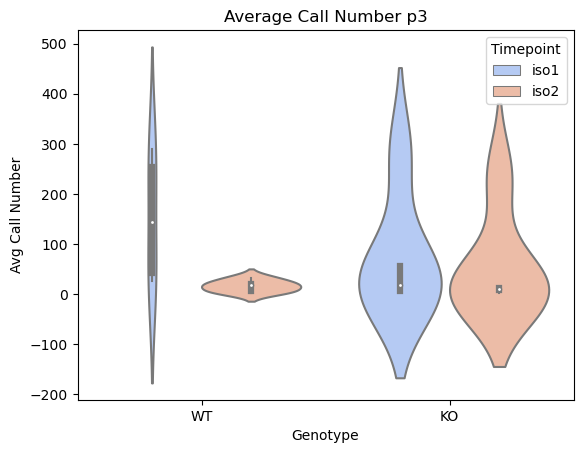

In [102]:
sns.violinplot(data = pup_df_g,x = 'Genotype',y='File',hue='Timepoint', hue_order = ['iso1', 'iso2'],order = ['WT','KO'],palette='coolwarm')
plt.ylabel('Avg Call Number')
plt.xlabel('Genotype')
plt.title('Average Call Number p3')

In [103]:
# graph male genotype differences in call number over time
first_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 0) & (pup_df['Begin Time (s)'] <= 60)] #get indexes from time range
pup_df.loc[first_min_ind, 'Minute'] = 1 # add label for graphing to indicate timepoint

sec_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 61) & (pup_df['Begin Time (s)'] <= 120)]
pup_df.loc[sec_min_ind, 'Minute'] = 2

thrd_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 121) & (pup_df['Begin Time (s)'] <= 180)]
pup_df.loc[thrd_min_ind, 'Minute'] = 3

four_min_ind = pup_df.index[(pup_df['Begin Time (s)'] >= 181) & (pup_df['Begin Time (s)'] <= 300)]
pup_df.loc[four_min_ind, 'Minute'] = 4

pup_df_min_g = pup_df.groupby(['Rat','Genotype','Timepoint','Minute']).count() # count number of calls per minute
pup_df_min_g = pup_df_min_g.reset_index() # adds indices back to columns for graphing
pup_df_min_g


,Rat,Genotype,Timepoint,Minute,File,ID,Label,Accepted,Score,Begin Time (s),...,Principal Frequency (kHz),Low Freq (kHz),High Freq (kHz),Delta Freq (kHz),Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz)
0,563,WT,iso1,1.0,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
1,563,WT,iso1,2.0,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
2,563,WT,iso1,3.0,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
3,563,WT,iso1,4.0,188,188,188,188,188,188,...,188,188,188,188,188,188,188,188,188,188
4,563,WT,iso2,1.0,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,585,KO,iso1,4.0,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
61,585,KO,iso2,1.0,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
62,585,KO,iso2,2.0,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
63,585,KO,iso2,3.0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Text(0.5, 1.0, 'Avg Call per Minute Male')

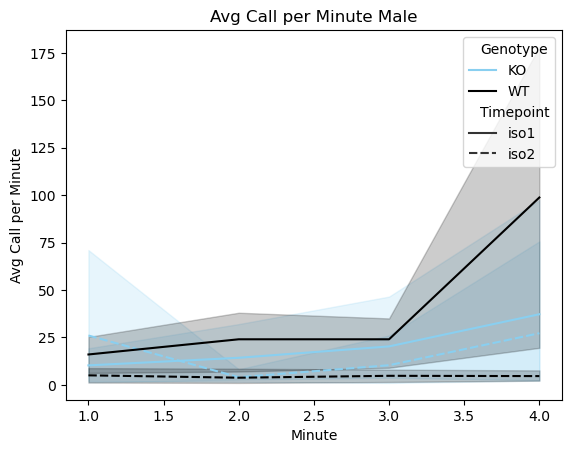

In [104]:
# cont
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=pup_df_min_g,x='Minute',y='ID',hue='Genotype',style='Timepoint',hue_order=['KO','WT'])
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute Male') 

Text(0.5, 1.0, 'Avg Call per Minute 1st Isolation')

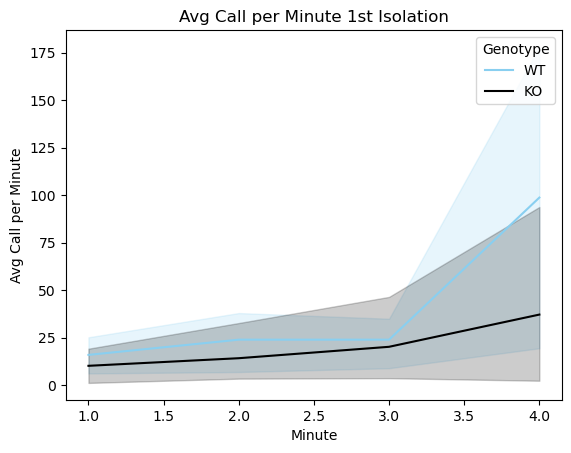

In [105]:
# graph just pre-mom
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
test = pup_df_min_g.loc[pup_df_min_g['Timepoint'] == 'iso1']
sns.lineplot(data=test,x='Minute',y='ID',hue='Genotype')
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute 1st Isolation') 

Text(0.5, 1.0, 'Avg Call per Minute 2nd Isolation')

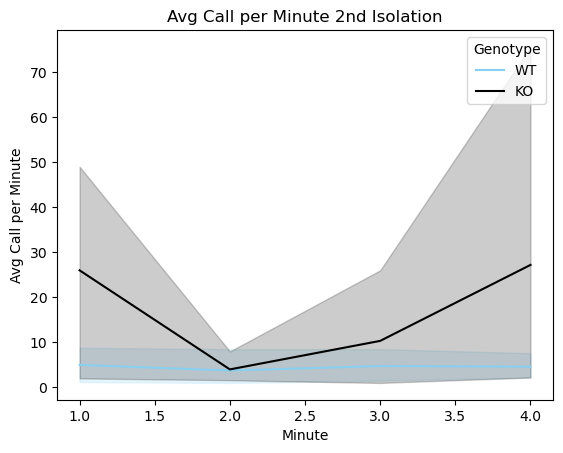

In [106]:
# graph just post-mom
test = pup_df_min_g.loc[pup_df_min_g['Timepoint'] == 'iso2']
sns.lineplot(data=test,x='Minute',y='ID',hue='Genotype')
plt.ylabel('Avg Call per Minute')
plt.xlabel('Minute')
plt.title('Avg Call per Minute 2nd Isolation') 

# Duration Comparison

Text(0.5, 1.0, 'Avg Duration')

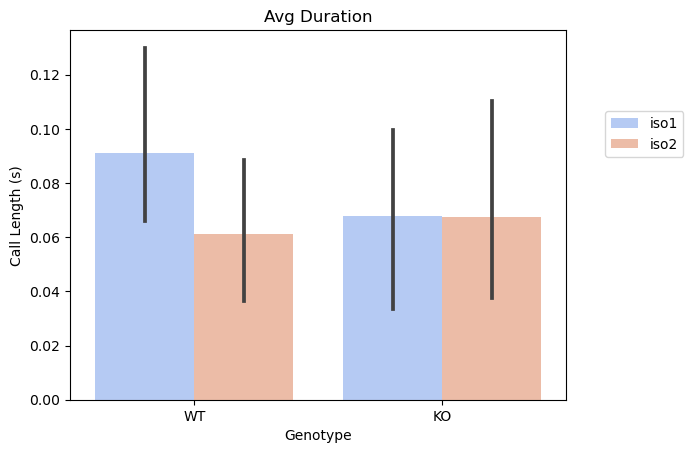

In [145]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Call Length (s)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Duration') 

Text(0.5, 1.0, 'Avg Duration')

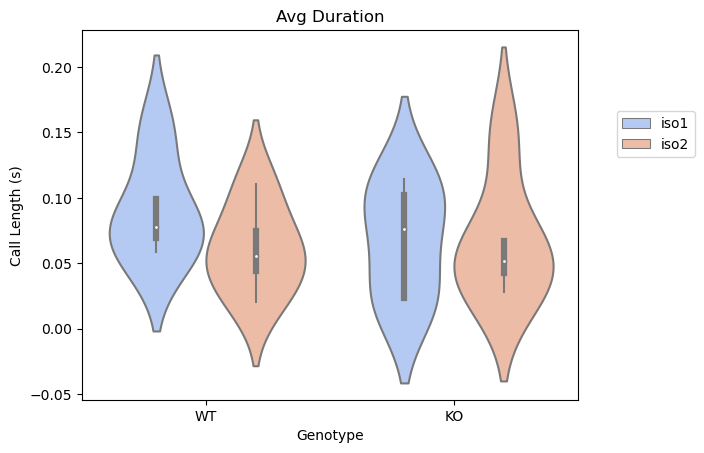

In [147]:
sns.violinplot(data=pup_df_rat_avg,x='Genotype',y='Call Length (s)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Duration') 

Text(0.5, 1.0, 'Avg Duration per Minute')

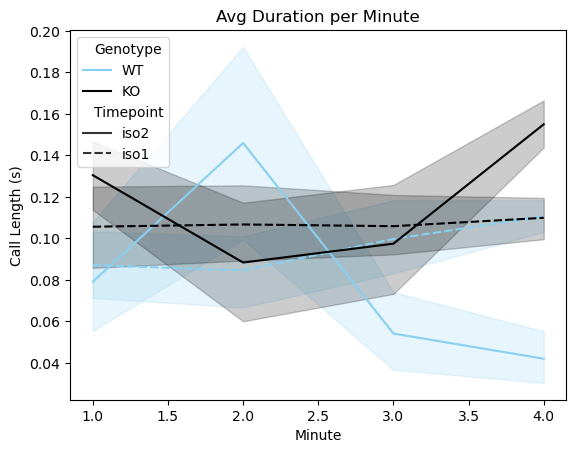

In [148]:
# duration over time both
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Call Length (s)',hue='Genotype',style='Timepoint')
plt.title('Avg Duration per Minute') 

# Principal Freq

In [111]:
pup_df
test = pup_df.reset_index()
test

,index,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),...,Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Rat,Timepoint,Minute
0,0,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,1,Usv,True,0.690815,0.044876,0.079959,0.035082,52.381162,...,0.408459,-39.452935,1.048092,-75.596722,0.720937,52.680458,WT,581,iso2,1.0
1,1,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,2,Usv,True,0.917282,37.562044,37.613821,0.051776,43.119266,...,0.333442,8.532215,1.119662,-90.032680,0.455021,43.379205,WT,581,iso2,1.0
2,2,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,3,Usv,True,0.534721,37.649007,37.665313,0.016306,30.375314,...,1.330307,-168.786741,1.142231,-109.660727,0.199961,30.375314,WT,581,iso2,1.0
3,3,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,4,Flat,True,0.817622,41.276037,41.386155,0.110118,42.038043,...,0.777406,-17.482311,1.621281,-81.213123,0.639960,43.342391,WT,581,iso2,1.0
4,4,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,5,Usv,True,0.767722,41.786509,41.791733,0.005224,41.349496,...,0.208773,-58.376762,1.271527,-97.818981,0.379049,41.349496,WT,581,iso2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,397,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,6,Inverted_U,True,0.795375,83.304009,83.350457,0.046447,44.842094,...,0.725677,-39.691387,1.173284,-77.436638,0.725098,45.142447,KO,568,iso2,2.0
1327,398,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,7,Downward_Ramp,True,0.508736,105.677868,105.683162,0.005294,65.381637,...,3.774203,767.256637,5.963294,-103.317586,0.190047,63.501106,KO,568,iso2,2.0
1328,399,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,8,Downward_Ramp,True,0.661902,182.973703,182.992056,0.018353,61.450985,...,1.204690,53.172662,2.522225,-103.281297,0.210152,62.509077,KO,568,iso2,4.0
1329,400,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,9,Usv,True,0.501538,258.900187,258.936310,0.036124,55.235253,...,1.628478,-49.805320,1.432218,-102.896638,0.176167,54.439373,KO,568,iso2,4.0


Text(0.5, 1.0, 'Avg Principal Frequency')

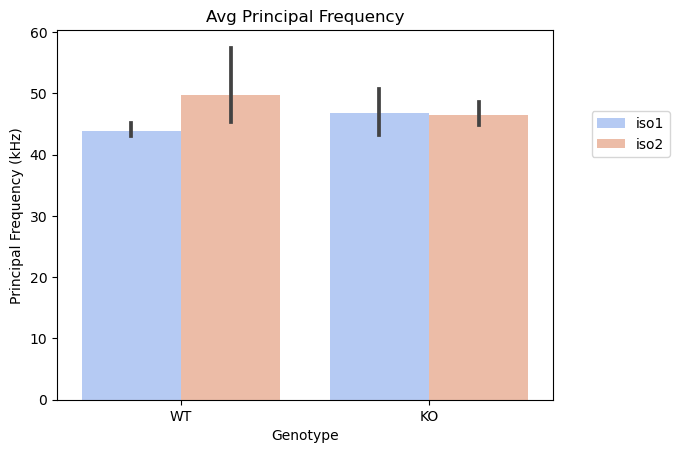

In [149]:
# both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Principal Frequency (kHz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Principal Frequency') 

Text(0.5, 1.0, 'Avg Principal Frequency')

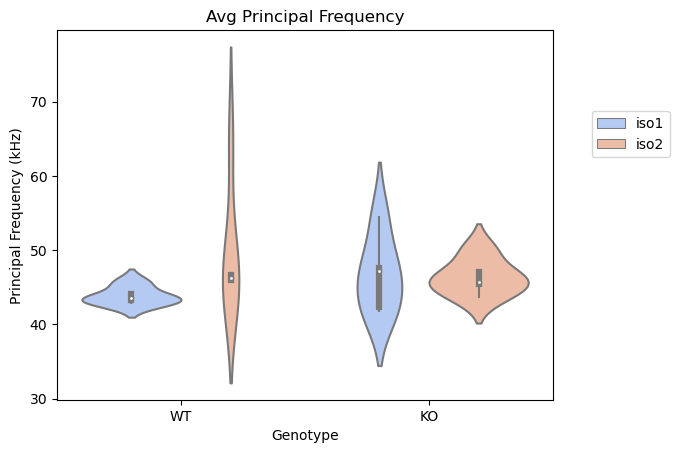

In [150]:
sns.violinplot(data=pup_df_rat_avg,x='Genotype',y='Principal Frequency (kHz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Principal Frequency') 

# Slope Comparison

Text(0.5, 1.0, 'Avg Slope')

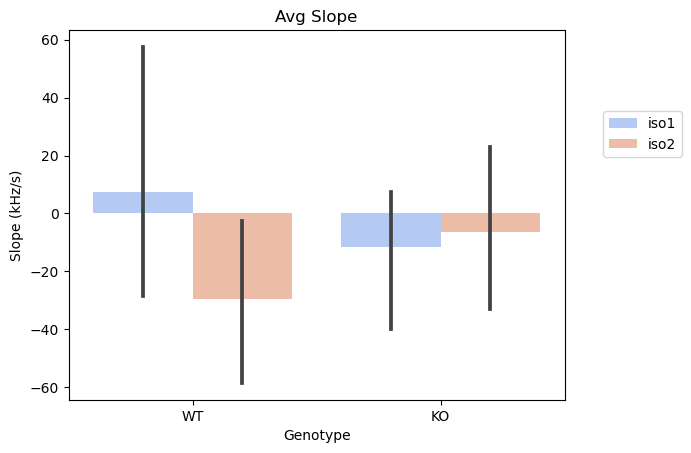

In [151]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Slope (kHz/s)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Slope') 


Text(0.5, 1.0, 'Avg Slope per Minute')

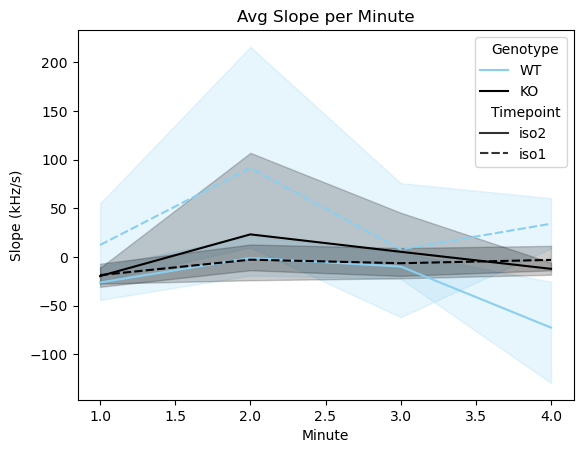

In [152]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Slope (kHz/s)',hue='Genotype',style='Timepoint')
plt.title('Avg Slope per Minute') 

# Delta Frequency 


Text(0.5, 1.0, 'Avg Delta Frequency')

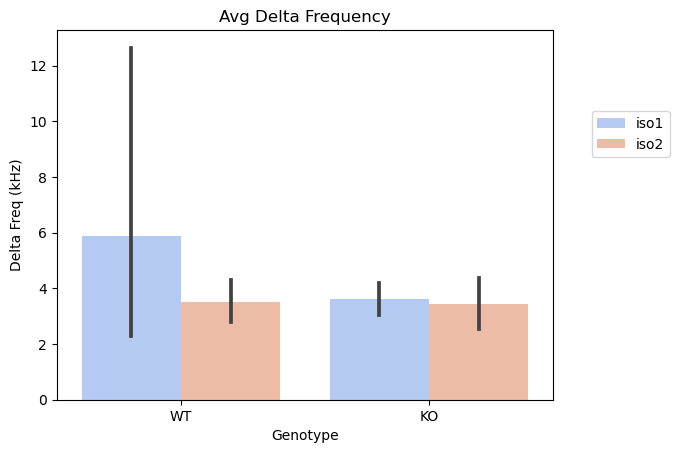

In [153]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Delta Freq (kHz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Delta Frequency') 


Text(0.5, 1.0, 'Avg Delta Frequency')

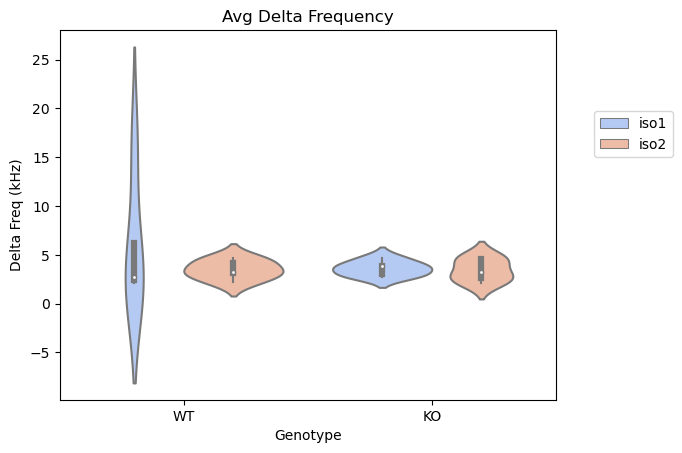

In [154]:
sns.violinplot(data=pup_df_rat_avg,x='Genotype',y='Delta Freq (kHz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Delta Frequency') 

Text(0.5, 1.0, 'Avg Delta Frequency per Minute')

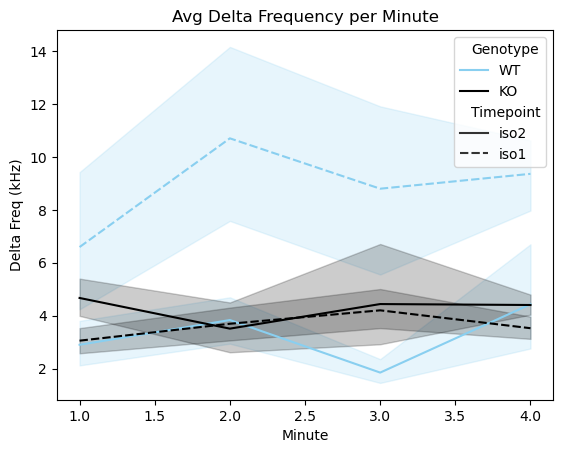

In [155]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Delta Freq (kHz)',hue='Genotype',style='Timepoint')
plt.title('Avg Delta Frequency per Minute') 

# Sinusoity

Text(0.5, 1.0, 'Avg Sinuosity Frequency')

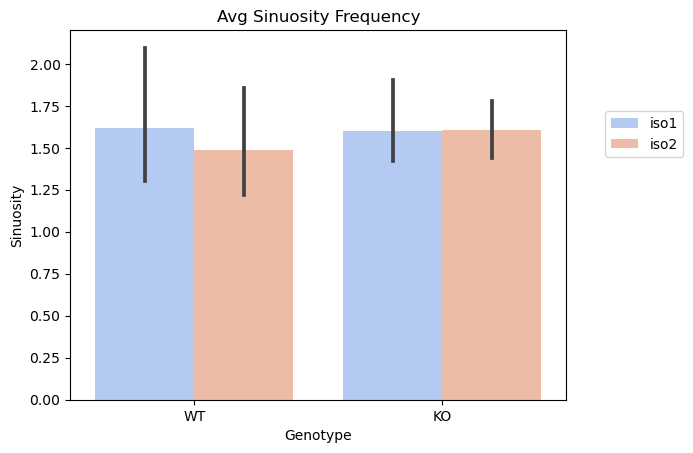

In [156]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Sinuosity',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Sinuosity Frequency')

Text(0.5, 1.0, 'Avg Sinuosity per Minute')

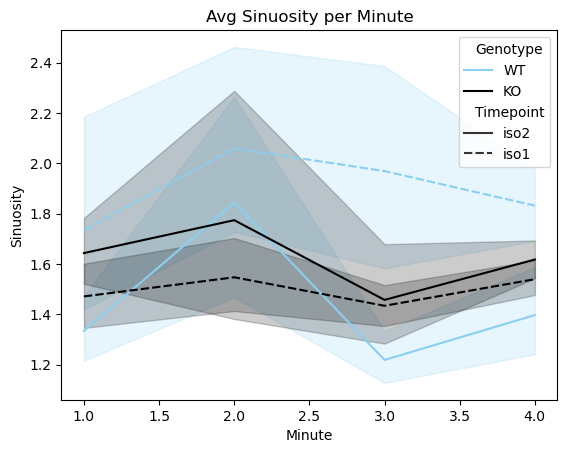

In [157]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Sinuosity',hue='Genotype',style='Timepoint')
plt.title('Avg Sinuosity per Minute') 

# Mean Power


Text(0.5, 1.0, 'Avg Mean Power (dB/Hz)')

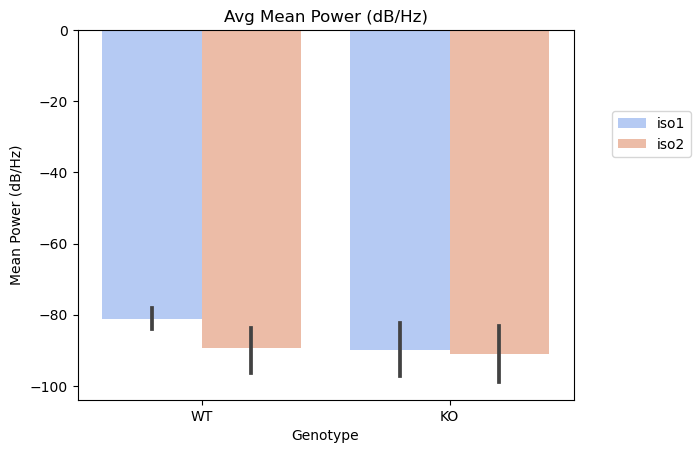

In [158]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Mean Power (dB/Hz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Mean Power (dB/Hz)')

Text(0.5, 1.0, 'Avg Mean Power (dB/Hz)')

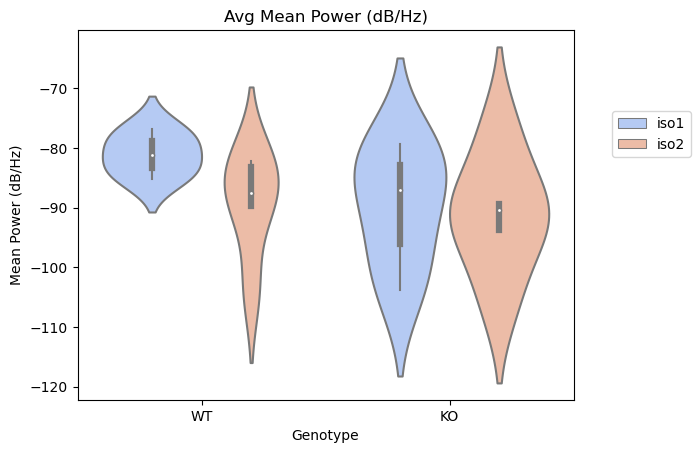

In [159]:
sns.violinplot(data=pup_df_rat_avg,x='Genotype',y='Mean Power (dB/Hz)',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Mean Power (dB/Hz)')

Text(0.5, 1.0, 'Avg Mean Power per Minute')

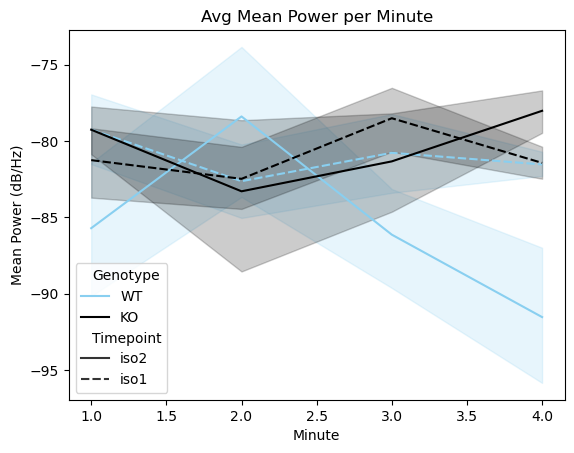

In [160]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Mean Power (dB/Hz)',hue='Genotype',style='Timepoint')
plt.title('Avg Mean Power per Minute') 

# Tonality

Text(0.5, 1.0, 'Avg Tonality')

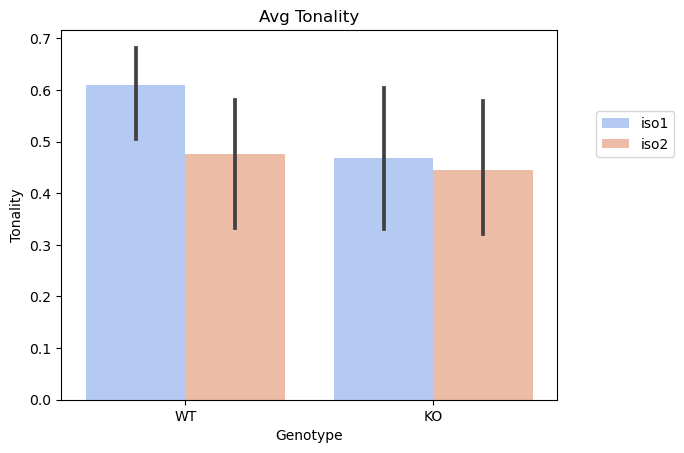

In [161]:
#both sexes
sns.barplot(data=pup_df_rat_avg,x='Genotype',y='Tonality',hue='Timepoint',palette='coolwarm',order=['WT','KO'])
plt.legend(loc='upper right', bbox_to_anchor=(1.25, .8))
plt.title('Avg Tonality')

Text(0.5, 1.0, 'Avg Tonality per Minute')

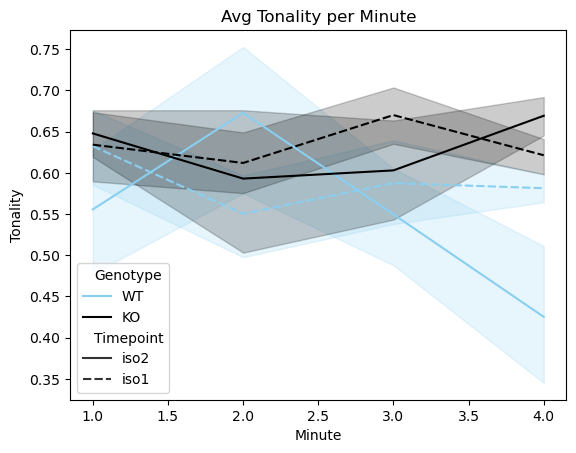

In [162]:
# duration over time both sexes
colors = ["#89CFF0", "#000000"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(data=test,x='Minute',y='Tonality',hue='Genotype',style='Timepoint')
plt.title('Avg Tonality per Minute') 

# Call Type Comparison

In [163]:
# pie chart between wt and het
KO_flat_df = pup_df.loc[pup_df['Genotype'] == 'KO']
wt_flat_df = pup_df.loc[pup_df['Genotype'] == 'WT']
wt_flat_df

,File,ID,Label,Accepted,Score,Begin Time (s),End Time (s),Call Length (s),Principal Frequency (kHz),Low Freq (kHz),...,Frequency Standard Deviation (kHz),Slope (kHz/s),Sinuosity,Mean Power (dB/Hz),Tonality,Peak Freq (kHz),Genotype,Rat,Timepoint,Minute
0,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,1,Usv,True,0.690815,0.044876,0.079959,0.035082,52.381162,52.081866,...,0.408459,-39.452935,1.048092,-75.596722,0.720937,52.680458,WT,581,iso2,1.0
1,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,2,Usv,True,0.917282,37.562044,37.613821,0.051776,43.119266,42.859327,...,0.333442,8.532215,1.119662,-90.032680,0.455021,43.379205,WT,581,iso2,1.0
2,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,3,Usv,True,0.534721,37.649007,37.665313,0.016306,30.375314,29.521043,...,1.330307,-168.786741,1.142231,-109.660727,0.199961,30.375314,WT,581,iso2,1.0
3,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,4,Flat,True,0.817622,41.276037,41.386155,0.110118,42.038043,41.385870,...,0.777406,-17.482311,1.621281,-81.213123,0.639960,43.342391,WT,581,iso2,1.0
4,D:\Rat Pup call analysis\litter le 16 fmr1\p3\...,5,Usv,True,0.767722,41.786509,41.791733,0.005224,41.349496,40.968330,...,0.208773,-58.376762,1.271527,-97.818981,0.379049,41.349496,WT,581,iso2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,17,Usv,True,0.815751,80.341147,80.370371,0.029224,45.046083,43.283410,...,1.751441,-171.568082,1.266494,-88.125502,0.452771,48.375576,WT,563,iso2,4.0
307,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,18,Usv,True,0.728575,139.793098,139.832586,0.039488,44.642210,44.642210,...,6.412141,-536.742078,1.166702,-90.787191,0.293623,44.642210,WT,563,iso2,4.0
308,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,19,Usv,True,0.520883,184.093604,184.120287,0.026682,43.082562,36.261574,...,2.873853,-136.701197,1.443712,-106.236512,0.206261,36.261574,WT,563,iso2,4.0
309,D:\Rat Pup call analysis\litter le15 fmr1\p3\r...,20,Usv,True,0.686909,188.945521,188.979692,0.034171,45.185918,37.116297,...,4.445563,-10.225125,1.996583,-103.242907,0.187134,37.116297,WT,563,iso2,4.0


<Axes: >

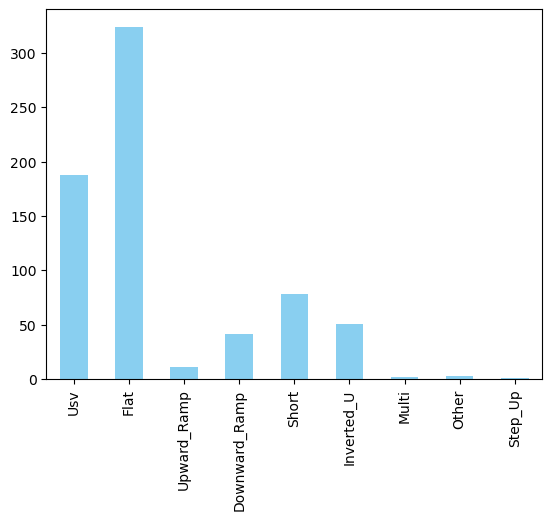

In [166]:
wt_flat_df['Label'].value_counts(sort=False).plot.bar()


<Axes: >

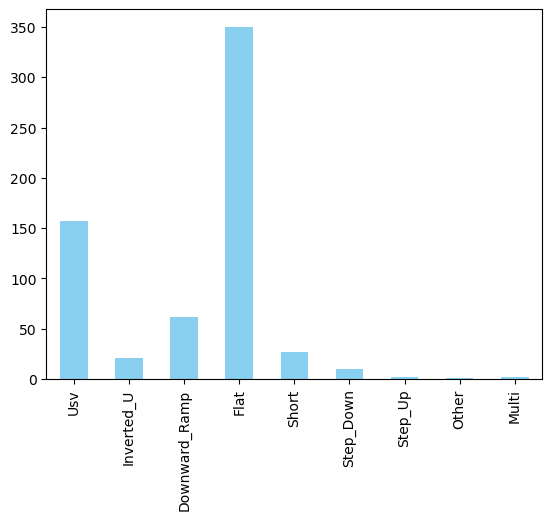

In [167]:
KO_flat_df['Label'].value_counts(sort=False).plot.bar()
